# Cartopy Test

#### Imports

In [1]:
import cartopy.crs as ccrs
import fsspec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import zarr

In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
dfFilt = df[df.variable_id.eq('thetao') & df.experiment_id.eq('historical') & df.source_id.eq('E3SM-1-0')]
zstore = dfFilt.zstore.values[0]
mapper = fsspec.get_mapper(zstore)
fileRaw = xr.open_zarr(mapper, consolidated=True)

#### Data Selection

In [33]:
dataRaw = fileRaw.thetao
data =dataRaw.sel(lev=5.0,time='1950-01')
data_so = data.where(data.lat<-30,drop=True)

#### Single Figure Plots

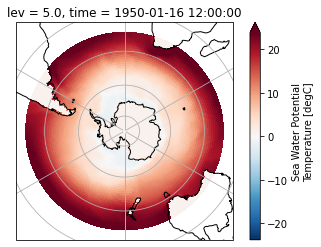

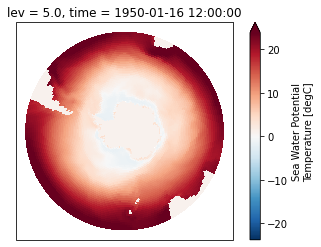

In [52]:
plt.figure(1)
p=data_so.plot(x='lon',y='lat',transform=ccrs.PlateCarree(),cmap='RdBu_r',robust=True,
    subplot_kws={'projection': ccrs.SouthPolarStereo()})
p.axes.gridlines()
p.axes.coastlines()

plt.figure(2)
p2=data_so.plot(x='lon',y='lat',transform=ccrs.PlateCarree(),cmap='RdBu_r',robust=True,
    subplot_kws={'projection': ccrs.SouthPolarStereo()})

plt.show()

#### Combined Subplots - Currently results in error

<Figure size 7200x720 with 0 Axes>

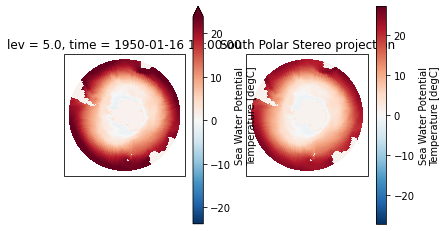

In [82]:
plt.figure(1, figsize=(100,10))
fig, (ax1, ax2) =plt.subplots(1,2,subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
data_so.plot(ax=ax1,  x='lon', y='lat', cmap='RdBu_r',robust=True, transform=ccrs.PlateCarree())
data_so.plot(ax=ax2, transform=ccrs.PlateCarree())
ax.gridlines()
#ax.coastlines()
plt.title("South Polar Stereo projection")

plt.show()